In [2]:
import numpy as np
import time
import read_airbus_data

In [3]:
t_data, v_data = read_airbus_data.read_airbus_data()

In [4]:
def gray_scale_encoding(X, params={}):
	if params == {}:
		# default parameters
		params = {
		's':8, 
		'P':255, 
		'K': 64, 
		'UB': np.max(X), 
		'LB': np.min(X),
		'round':True }

	# assign parameters
	s = params['s']
	P = params['P']
	K = params['K']
	UB = params['UB']
	LB = params['LB']
	C = 1/(UB - LB)
	im = np.zeros((K,K))

	if params['round']: # round
		for i in range(K):
			for j in range(K):
				im[i,j] = np.round(
					P*(X[(i - 1)*s + j] - LB)*C)

	else: # don't round
		for i in range(K):
			for j in range(K):
				im[i,j] = P*(X[(i - 1)*s + j] - LB)*C

	return im

21.497825407505445 -22.886807811081734


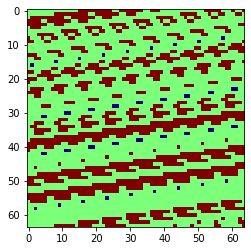

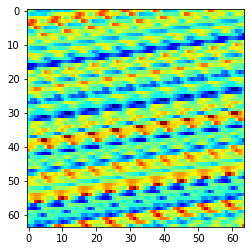

1.0
0.0


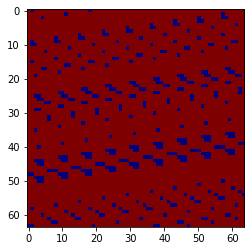

In [5]:
from matplotlib import pyplot as plt

UB = 1.2*np.max(t_data)
LB = 1.2*np.min(t_data)
print(UB, LB)

# P = 255, round = True
test = gray_scale_encoding(
    t_data[1174][:512], params={'s':7, 'P':255, 'K':64, 'UB':UB,'LB':LB,'round':True})

plt.imshow(test,cmap='jet')
plt.show()

# P = 1, round = False
test = gray_scale_encoding(
    t_data[1174][:512], params={'s':7, 'P':1, 'K':64, 'UB':UB,'LB':LB,'round':False})

plt.imshow(test,cmap='jet')
plt.show()

# P = 1, round = True
test = gray_scale_encoding(
    t_data[111][:512], params={'s':7, 'P':1, 'K':64, 'UB':UB,'LB':LB,'round':True})

print(np.max(test))
print(np.min(test))

plt.imshow(test,cmap='jet')
plt.show()

In [ ]:
import time
# turn training data into a sequence of 120 images:
K = 64
params = {'s':7, 'P':1, 'K':K, 'UB':UB,'LB':LB, 'round': True}
gs_t_data = np.zeros((1677, 120, K, K))
t0 = time.time()
for k in range(594):
    for l in range(120):
        start = int(512*l)
        stop = int(512*(l+1))
        gs_t_data[k,l] = gray_scale_encoding(t_data[k][start:stop], params)

print('time elapsed is: ', time.time() - t0)

np.save('../airbus_data/gs_p1round_t_data.npy', gs_t_data)

In [ ]:
np.save('../airbus_data/gs_p1round_t_data.npy', gs_t_data)

In [4]:
load_t0 = time.time()
gs_t_data = np.load('../airbus_data/gs_p1_t_data.npy')
gs_v_data = np.load('../airbus_data/gs_p1_v_data.npy')
print('load time is: ', time.time() - load_t0)

load time is:  10.60139799118042
